# Project Example Notebook

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Getting and Preparing the Data

In [28]:
np.random.seed(0)

data = pd.read_csv("handwritten_data_sample.csv", encoding = "utf8")
print(data.shape)
print(data.values)
data = data.values

(999, 785)
[[ 7  0  0 ...  0  0  0]
 [18  0  0 ...  0  0  0]
 [20  0  0 ...  0  0  0]
 ...
 [ 9  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]]


In [29]:

np.random.shuffle(data)
X, y = data[:,1:], data[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)

classes = np.unique(y_train)
num_classes = 26

X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

In [31]:
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_train = (X_train - mean_image)/255
X_test = (X_test - mean_image)/255

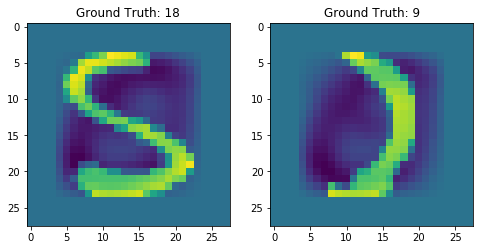

In [32]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(y_test[0]))

plt.show()

# Developing the Model
## [conv-relu-conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]

In [33]:

from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import LeakyReLU, ELU
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from keras.utils import to_categorical

from tensorflow.python.keras import initializers

optimizer = Adam(lr=1e-3)

Using TensorFlow backend.


In [34]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

model = Sequential()

#conv
model.add(Conv2D(filters=10, kernel_size=5, strides = 1, padding='same', activation='linear',
                 bias_initializer='RandomNormal', input_shape=(img_size,img_size,1)))

#ReLu
model.add(ELU(alpha=1.0))

#conv2
model.add(Conv2D(filters=10, kernel_size=5, strides = 1, padding='same', activation='linear',
                 bias_initializer='RandomNormal', input_shape=(img_size,img_size,1)))

#ReLu
model.add(ELU(alpha=1.0))

#MaxPool
model.add(MaxPooling2D(strides=1, padding='same'))

#Affine
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
elu_1 (ELU)                  (None, 28, 28, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 10)        2510      
_________________________________________________________________
elu_2 (ELU)                  (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                203866    
Total para

## Training the Model

In [35]:
model_train = model.fit(x=X_train,
          y=train_Y_one_hot,
          epochs=10, batch_size=128,verbose=1, validation_data=(X_test, test_Y_one_hot))

Train on 799 samples, validate on 200 samples
Epoch 1/10
799/799 [==============================] - 2s 2ms/step - loss: 4.2381 - acc: 0.1690 - val_loss: 4.0146 - val_acc: 0.0450
Epoch 2/10
799/799 [==============================] - 1s 2ms/step - loss: 3.0126 - acc: 0.2215 - val_loss: 2.5590 - val_acc: 0.2300
Epoch 3/10
799/799 [==============================] - 1s 2ms/step - loss: 2.2041 - acc: 0.4030 - val_loss: 2.0584 - val_acc: 0.4300
Epoch 4/10
799/799 [==============================] - 1s 2ms/step - loss: 1.6876 - acc: 0.5394 - val_loss: 1.5770 - val_acc: 0.5700
Epoch 5/10
799/799 [==============================] - 1s 2ms/step - loss: 1.2518 - acc: 0.6471 - val_loss: 1.2220 - val_acc: 0.6450
Epoch 6/10
799/799 [==============================] - 1s 2ms/step - loss: 0.9502 - acc: 0.7247 - val_loss: 1.0666 - val_acc: 0.6700
Epoch 7/10
799/799 [==============================] - 1s 2ms/step - loss: 0.7577 - acc: 0.7697 - val_loss: 0.9967 - val_acc: 0.7000
Epoch 8/10
799/799 [==========

## Testing the Model

In [36]:
test_eval = model.evaluate(X_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.8257601320743561
Test accuracy: 0.755


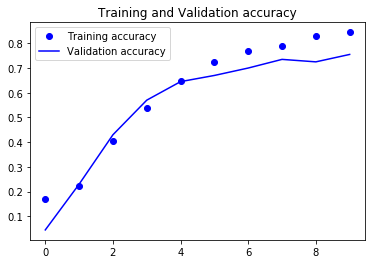

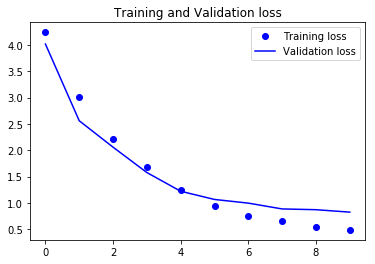

In [37]:
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()